In [1]:
import numpy as np
import h5py
import pandas as pd
from itertools import islice
from collections import Counter
import re
from itertools import islice
from collections import Counter
from io import BytesIO
import matplotlib.pyplot as plt
import scipy
import qnorm 
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
gt=pd.read_csv('great_table2.csv')

In [79]:
dee_top = pd.read_csv('dee_top.csv')
dee_top=dee_top.drop(columns = ['Unnamed: 0'],axis = 1)
exp_top = pd.read_csv('exp_top.csv')
exp_top=exp_top.drop(columns = ['Unnamed: 0'],axis = 1)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   2.,   1.,   0.,   1.,   2.,   0.,   0.,
          4.,   0.,   2.,   3.,   3.,   0.,   0.,   1.,   4.,   1.,   1.,
          3.,   3.,   7.,   4.,   4.,   3.,   8.,   1.,   4.,   7.,  12.,
          7.,   5.,   3.,   6.,   7.,   9.,   3.,   3.,   6.,   7.,   2.,
          3.,   3.,   2.,   5.,   8.,   5.,  13.,   7.,  12.,  19.,  40.,
         32.,  37.,  57.,  54.,  62.,  66.,  70.,  99.,  77., 106., 126.,
        129., 164., 194., 327., 501., 630., 791., 773., 522.,  81.,   0.,
         19.]),
 array([0.04683579, 0.05611433, 0.06539287, 0.07467141, 0.08394995,
        0.09322849, 0.10250703, 0.11178557, 0.12106411, 0.13034265,
        0.13962119, 0.14889973, 0.15817827, 0.16745681, 0.17673535,
        0.18601389, 0.19529243, 0.20457097, 0.21384951, 0.22312805,
        0.23240659, 0.24168513, 0.25096367, 0.

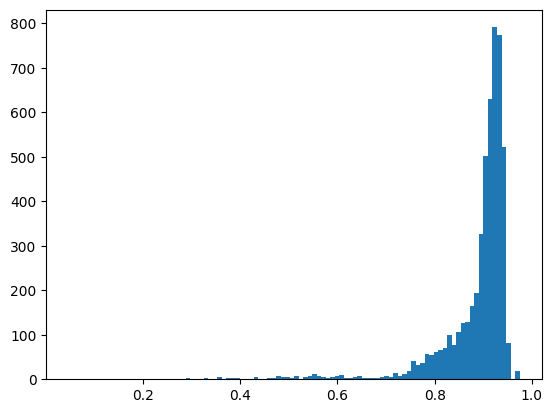

In [4]:
corr=exp_top.corrwith(dee_top, axis=0, drop=False, method='pearson')
plt.hist(corr, bins=100)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 6.000e+00, 5.000e+00, 4.000e+00, 5.000e+00,
        1.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 6.000e+00, 4.000e+00,
        1.300e+01, 8.000e+00, 4.000e+00, 6.000e+00, 5.000e+00, 3.000e+00,
        7.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 5.000e+00, 9.000e+00, 1.400e+01, 8.000e+00, 1.700e+01,
        2.000e+01, 2.400e+01, 4.000e+01, 5.400e+01, 5.200e+01, 3.400e+01,
        4.000e+01, 4.000e+01, 5.000e+0

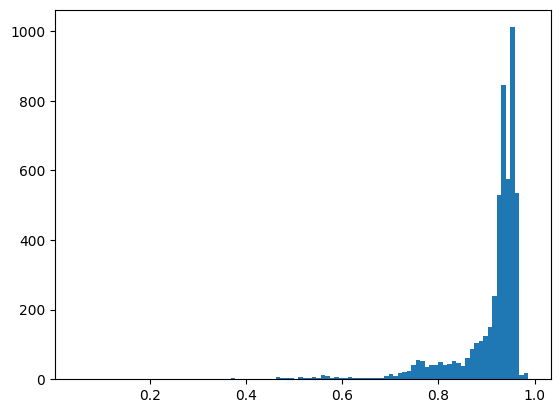

In [6]:
corr=exp_top.corrwith(dee_top, axis=0, drop=False, method='spearman')
plt.hist(corr, bins=100)

# Почему часть сэмплов скоррелирована хуже?

In [64]:
check=corr.index [corr<0.9 ]. tolist () # check contain list of geo
print(check[0:10])

['GSM1103002', 'GSM1103005', 'GSM1103009', 'GSM1103016', 'GSM1103017', 'GSM1119597', 'GSM1119598', 'GSM1119599', 'GSM1119600', 'GSM1192573']


In [65]:
table=pd.read_csv('table.csv')
small_val=table.loc[table['geo_accession']. isin(check)] #df contain rows with geo from check
print(len(small_val))

/var/folders/xm/lz8thrrs1l5cks282q243ty40000gn/T/ipykernel_3897/3977479882.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  table=pd.read_csv('table.csv')


1224


In [66]:
small_val_count=small_val['data_processing'].value_counts()
print(small_val_count.head(50))

b'Illumina Casava 1.8.2 software used for basecalling.\tReads were decoded based on their barcodes. Read quality was evaluated using FastQC.\tReads were mapped to the reference genome (mouse mm10) using Array Studio allowing one mismatch.\tGenome_build: mm10\tSupplementary_files_format_and_content: tab-delimited text files include RPKM values for each sample'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [67]:
anticheck=corr.index [corr>=0.9 ]. tolist () # anticheck contain list of geo

In [68]:
high_val=table.loc[table['geo_accession']. isin(anticheck)] #df contain rows with geo from check

In [69]:
print(len(high_val)) # number of rows with geo from check

3954


In [70]:
high_val_count=high_val['data_processing'].value_counts()
print(high_val_count.head(5))
print(len(high_val_count))

b'RNA-seq fastq files were aligned to the mouse genome using Tophat v1.3.3 with the following options: -p 4 -a 8 -m 0 -i 70 -I 500000 -g 1 --library-type fr-firststrand --no-novel-indels --coverage-search --min-coverage-intron 50 --max-coverage-intron 20000 --no-closure-search --initial-read-mismatches 2 --segment-mismatches 2 --s. Only uniquely mapped reads were kept for downstream analysis.\tAll aligned reads were imported to SeqMonk. The mRNA expression was calculated by totaling all uniquely aligned exonic reads. The raw reads were converted to RPKM by dividing the reads by the cDNA length and the total number of uniquely mapped reads in the sample.\tBedgraph files were generated from aligned BAM files using the Bedtools suite: genomeCoverageBed -bg -split, using the mouse mm9 reference genome.\tGenome_build: mm9\tSupplementary_files_format_and_content: bedgraph files for each sample represent the read coverage at each genomic position.'                                             

**А сколько строк с Illumina Casava 1.8.2 в списке с гео с высокой корреляцией?**

In [71]:
print(len(high_val[high_val['data_processing'].str.contains('Illumina Casava 1.8.2')]))

6


**только 6!**

In [72]:
small_val_extr=small_val['extract_protocol_ch1'].value_counts()
print(small_val_extr.head(5))


b'Single islet cells were captured with C1 Integrated Fluidic Circuit. Cell lysing, reverse transcription and cDNA amplification were performed on the C1 Single-Cell Auto Prep IFC, as specified by the manufacturer (Protocol #100-7168 E1). The SMARTer Ultra Low RNA Kit (Clontech) was used for cDNA synthesis from the single cells.\tIllumina NGS library was constructed with Nextera XT DNA Sample Prep kit (Illumina), according to the manufacturer\xe2\x80\x99s recommendations (Protocol #100-7168 E1).'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [73]:
high_val_extr=high_val['extract_protocol_ch1'].value_counts()
print(high_val_extr.head(5))

b"total RNA was biochemically purified as previously described (Bhatt et al, Cell 2012). Cells were resuspended in TriReagent and RNAs were purified using Rneasy columns (Qiagen).\tAll mRNA libraries were generated using the Illumina Truseq v.2 kit with a few modifications: strand specific libraries were generated using the dUTP method. Briefly, the second strand cDNA was synthesized in the presence of dUTP. Prior to library amplification, the second strand was degraded with dUTPase. Few libraries were genearted using TruSeq Stranded mRNA Library Prep  Kit as per manufacturere's instructions."                                                                                                                                                                                                                                                                                                                                                                            240
b'After treatment, cells were im

In [74]:
print(len(small_val[small_val['extract_protocol_ch1'].str.contains('C1 Integrated Fluidic Circuit')]))

244


In [75]:
print(len(high_val[high_val['extract_protocol_ch1'].str.contains('C1 Integrated Fluidic Circuit')]))

0


**Как видим, много сэмплов с низкой корреляцией имеют протокол экстракции C1 Integrated Fluidic Circuit**\
**Однако всего 0 сэмпла с таким протоколом экстракции нет среди сэмплов с высокой корреляцией**

# Сделаем tsne b pc plot но уберем низкокоррелируемые сэмплы, ведь их целых 745! (высококоррелируемых более 4000)

In [80]:
exp_top.shape

(12000, 5179)

In [81]:
dee_top.shape

(12000, 5179)

In [82]:
exp_top.drop(columns = check, axis = 1, inplace=True)

In [83]:
dee_top.drop(columns = check, axis = 1, inplace=True)

In [84]:
dee_top.shape
exp_top.shape

(12000, 3955)

In [85]:
gsm_list=exp_top.columns.values.tolist()

In [103]:
def t_sne_color (a, t):
    if a=='type':
        b=t
        gsm_list=b.columns.values.tolist()
        type_list=gt['Cell_type'].loc[gt['geo_accession'].isin(gsm_list)]
        b.columns=type_list
        b_transposed = b.T
        m = TSNE (learning_rate='auto')
        tsne_features = m.fit_transform (b_transposed)
        b_transposed['x'] = tsne_features [:, 0]
        b_transposed['y'] = tsne_features [:, 1]
        sns.scatterplot (x='x', y='y',hue=b_transposed.index, data=b_transposed, alpha=0.6)
        plt.legend(bbox_to_anchor=(1, 0.6))
        plt.show ()
        
    if a=='class':
        b=t
        gsm_list=b.columns.values.tolist()
        class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
        b.columns=class_list
        b_transposed = b.T
        m = TSNE (learning_rate='auto')
        tsne_features = m.fit_transform (b_transposed)
        b_transposed['x'] = tsne_features [:, 0]
        b_transposed['y'] = tsne_features [:, 1]
        sns.scatterplot (x='x', y='y',hue=b_transposed.index, data=b_transposed, alpha=0.6)
        plt.legend(bbox_to_anchor=(1, 0.6))
        plt.show ()       


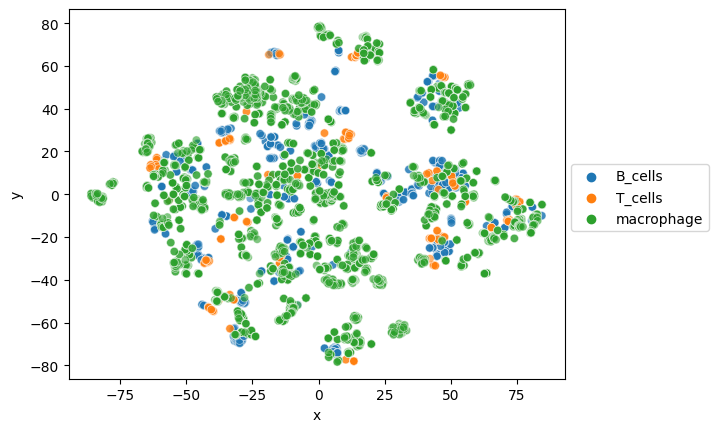

In [104]:
t_sne_color('type', dee_top)

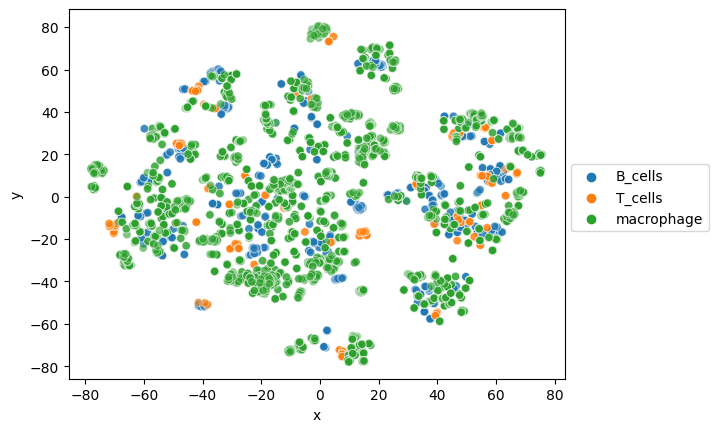

In [105]:
t_sne_color('type', exp_top)

In [86]:
def t_sne_color_small (a, t):
    b=t
    a=gt.loc[gt['Cell_type'] == a]
    a_geo=a['geo_accession'].values.tolist()
    b_typ=b.loc[:, b.columns.intersection(a_geo)]
    gsm_list=b_typ.columns.values.tolist()
    class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
    b_typ.columns=class_list
    b_typ_transposed = b_typ.T
    m = TSNE (learning_rate='auto')
    tsne_features = m.fit_transform (b_typ_transposed)
    b_typ_transposed['x'] = tsne_features [:, 0]
    b_typ_transposed['y'] = tsne_features [:, 1]
    sns.scatterplot (x='x', y='y',hue=b_typ_transposed.index, data=b_typ_transposed, alpha=0.6)
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.show ()  

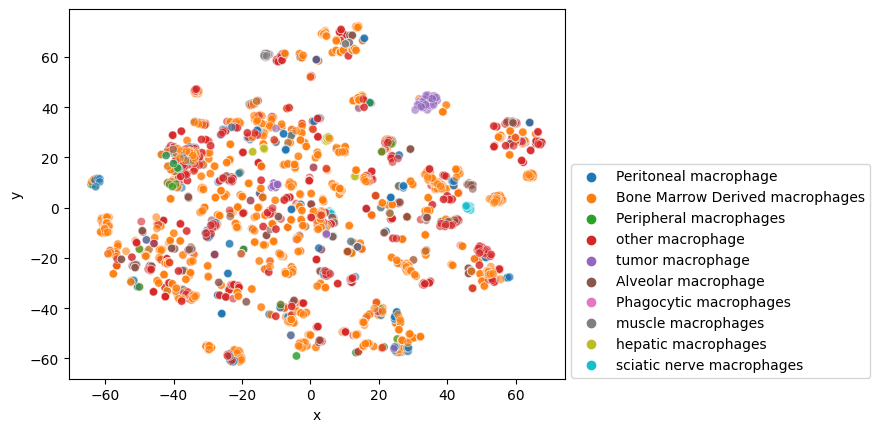

In [87]:
t_sne_color_small ('macrophage', exp_top)

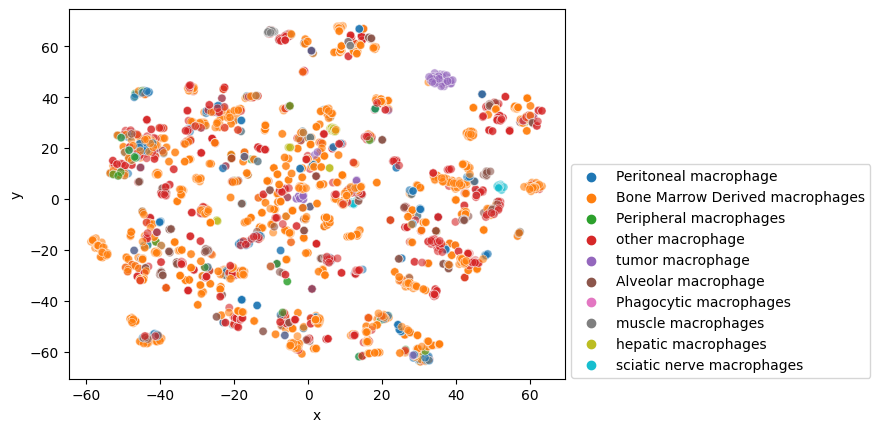

In [88]:
t_sne_color_small ('macrophage', dee_top)

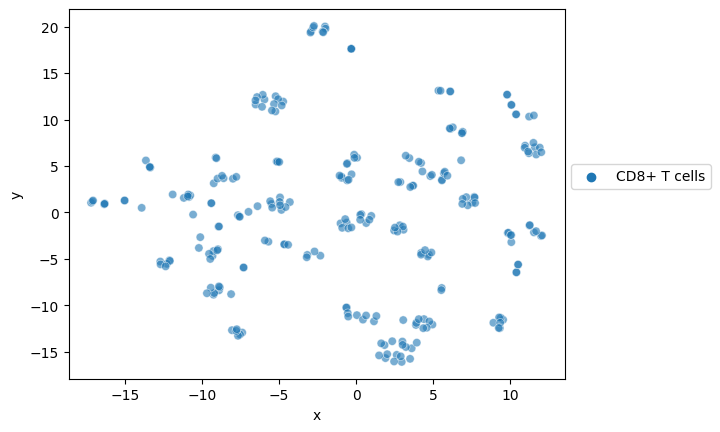

In [89]:
t_sne_color_small ('T_cells', dee_top)

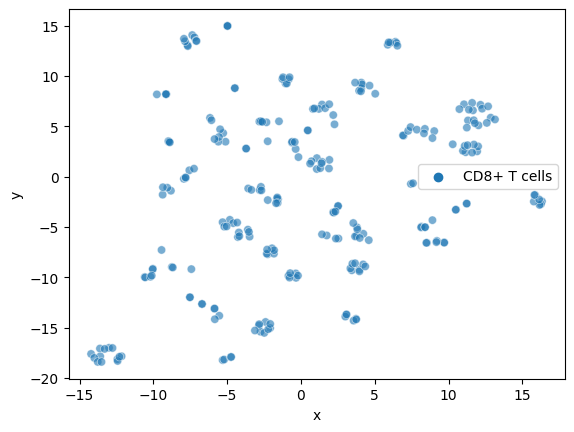

In [90]:
t_sne_color_small ('T_cells', exp_top)

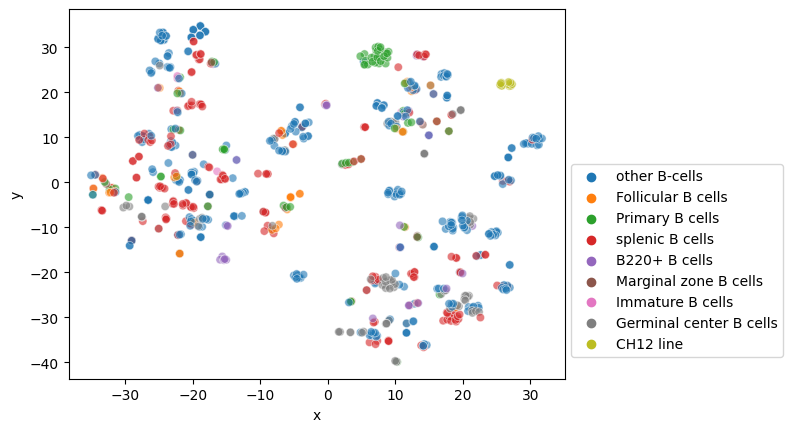

In [91]:
t_sne_color_small ('B_cells', dee_top)

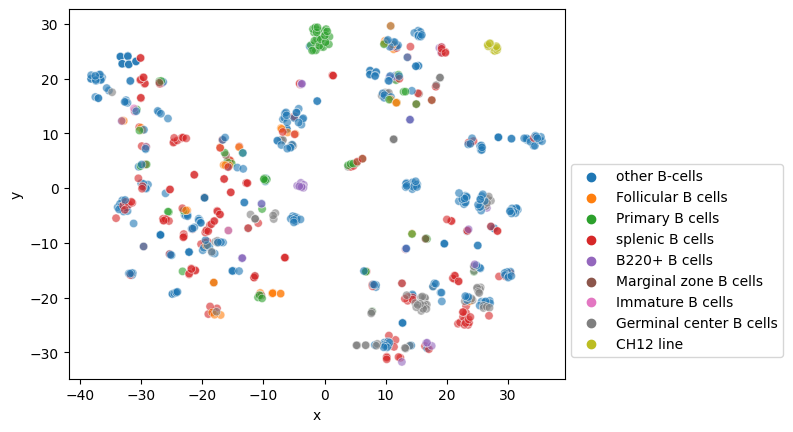

In [92]:
t_sne_color_small ('B_cells', exp_top)

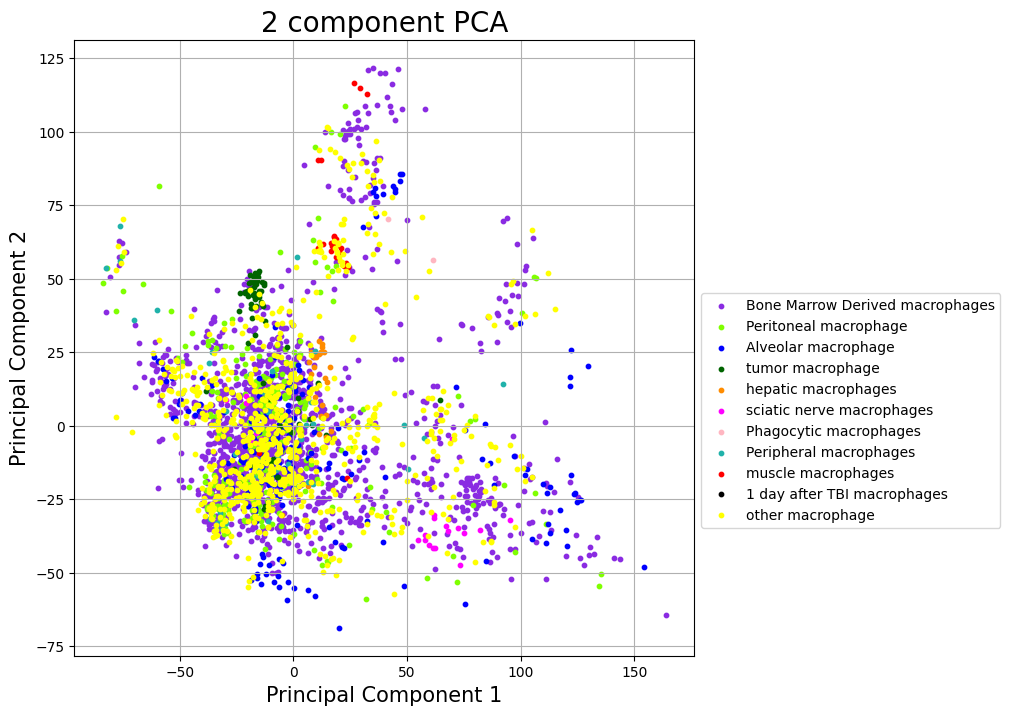

In [93]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
dee_typ=dee_top.loc[:, dee_top.columns.intersection(a_geo)]
gsm_list=dee_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
dee_typ.columns=class_list
dee_typ2=dee_typ.T
df=pd.DataFrame(dee_typ2.index)
from sklearn.preprocessing import StandardScaler
dee_st = StandardScaler().fit_transform(dee_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dee_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet', 'chartreuse', 'blue', 'darkgreen', 'darkorange', 'fuchsia', 'lightpink', 'lightseagreen', 'red', 'black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

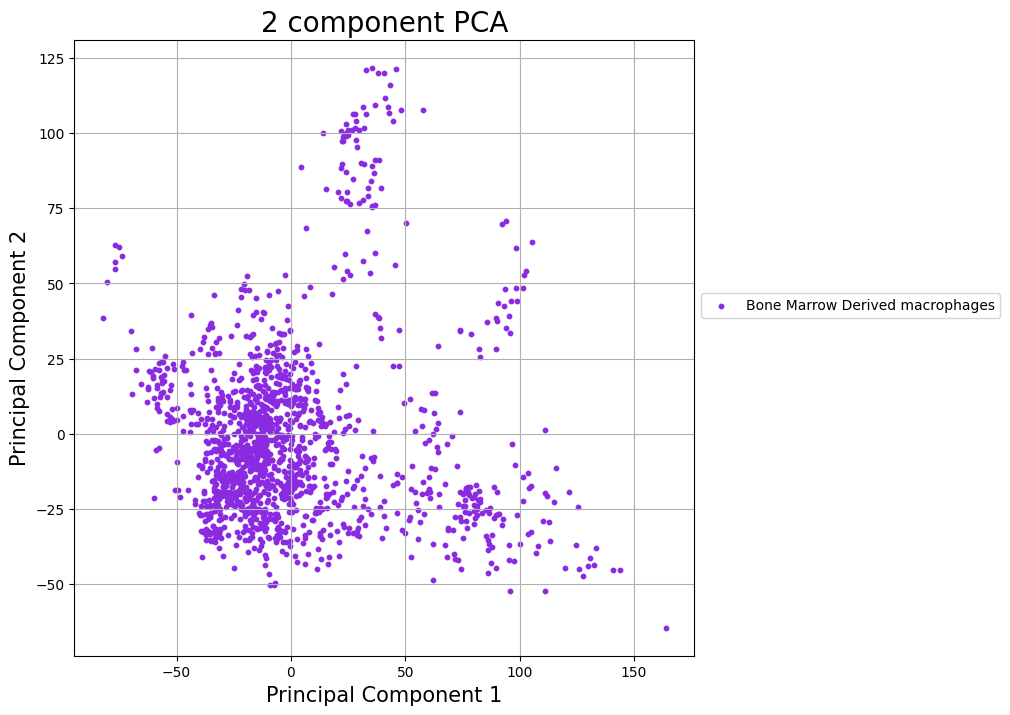

In [94]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
dee_typ=dee_top.loc[:, dee_top.columns.intersection(a_geo)]
gsm_list=dee_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
dee_typ.columns=class_list
dee_typ2=dee_typ.T
df=pd.DataFrame(dee_typ2.index)
from sklearn.preprocessing import StandardScaler
dee_st = StandardScaler().fit_transform(dee_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dee_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

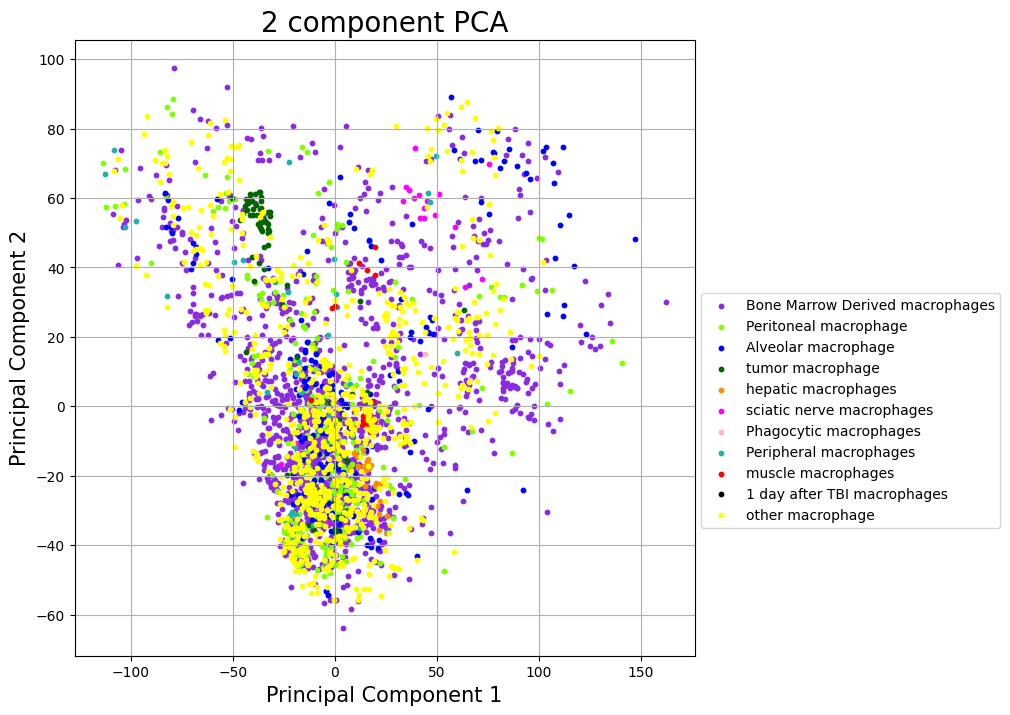

In [96]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
exp_typ=exp_top.loc[:, exp_top.columns.intersection(a_geo)]
gsm_list=exp_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
exp_typ.columns=class_list
exp_typ2=exp_typ.T
df=pd.DataFrame(exp_typ2.index)
from sklearn.preprocessing import StandardScaler
exp_st = StandardScaler().fit_transform(exp_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet', 'chartreuse', 'blue', 'darkgreen', 'darkorange', 'fuchsia', 'lightpink', 'lightseagreen', 'red', 'black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

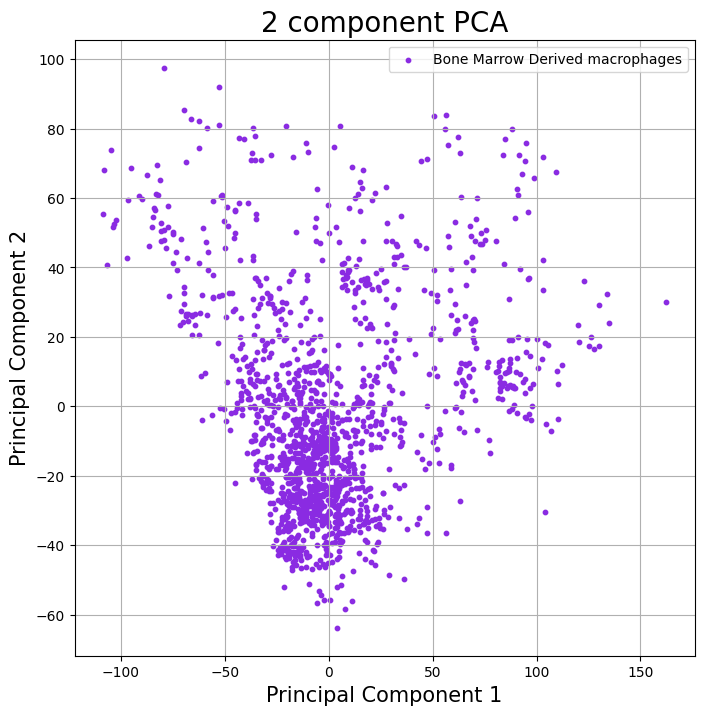

In [98]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
exp_typ=exp_top.loc[:, exp_top.columns.intersection(a_geo)]
gsm_list=exp_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
exp_typ.columns=class_list
exp_typ2=exp_typ.T
df=pd.DataFrame(exp_typ2.index)
from sklearn.preprocessing import StandardScaler
exp_st = StandardScaler().fit_transform(exp_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

**Как видим, дополнительный кластер исчез. Значит он соответствовал низкокоррелируемым сэмплам**

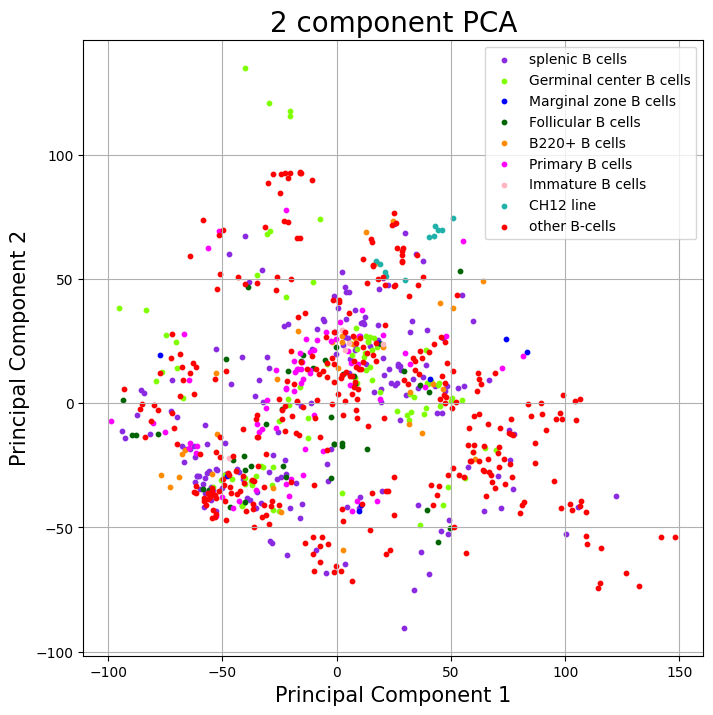

In [99]:
a=gt.loc[gt['Cell_type'] == 'B_cells']
a_geo=a['geo_accession'].values.tolist()
exp_typ=exp_top.loc[:, exp_top.columns.intersection(a_geo)]
gsm_list=exp_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
exp_typ.columns=class_list
exp_typ2=exp_typ.T
df=pd.DataFrame(exp_typ2.index)
from sklearn.preprocessing import StandardScaler
exp_st = StandardScaler().fit_transform(exp_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
colors = ['blueviolet', 'chartreuse', 'blue', 'darkgreen', 'darkorange', 'fuchsia', 'lightpink', 'lightseagreen', 'red', 'black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

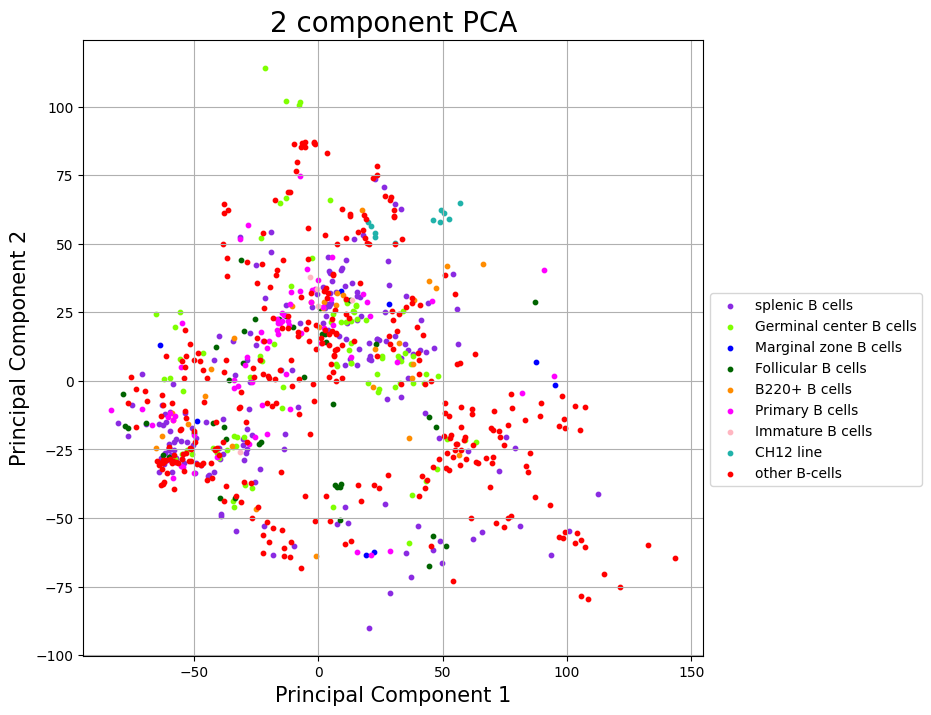

In [100]:
a=gt.loc[gt['Cell_type'] == 'B_cells']
a_geo=a['geo_accession'].values.tolist()
dee_typ=dee_top.loc[:, dee_top.columns.intersection(a_geo)]
gsm_list=dee_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
dee_typ.columns=class_list
dee_typ2=dee_typ.T
df=pd.DataFrame(dee_typ2.index)
from sklearn.preprocessing import StandardScaler
dee_st = StandardScaler().fit_transform(dee_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dee_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

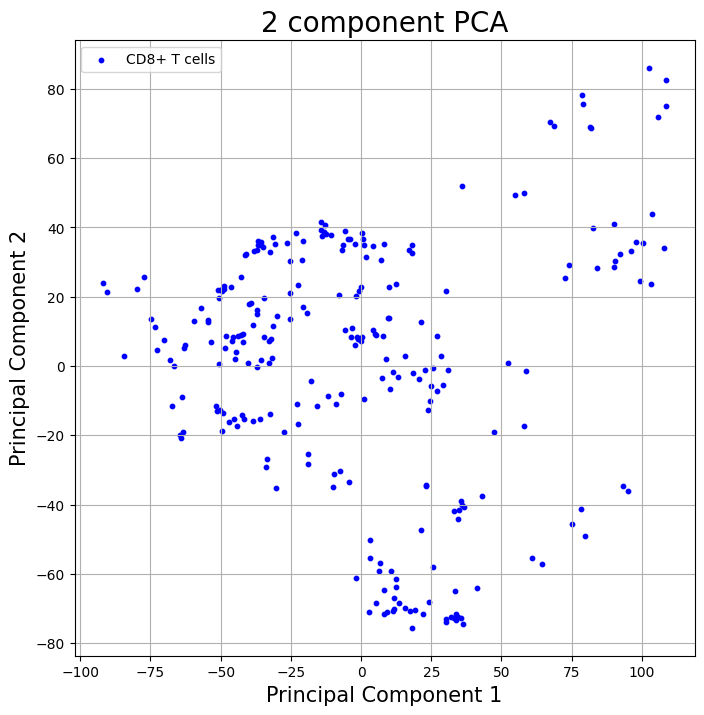

In [101]:
a=gt.loc[gt['Cell_type'] == 'T_cells']
a_geo=a['geo_accession'].values.tolist()
exp_typ=exp_top.loc[:, exp_top.columns.intersection(a_geo)]
gsm_list=exp_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
exp_typ.columns=class_list
exp_typ2=exp_typ.T
df=pd.DataFrame(exp_typ2.index)
from sklearn.preprocessing import StandardScaler
exp_st = StandardScaler().fit_transform(exp_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['CD8+ T cells']
colors = ['blue', 'darkgreen', 'darkorange', 'fuchsia', 'lightpink', 'lightseagreen', 'red', 'black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

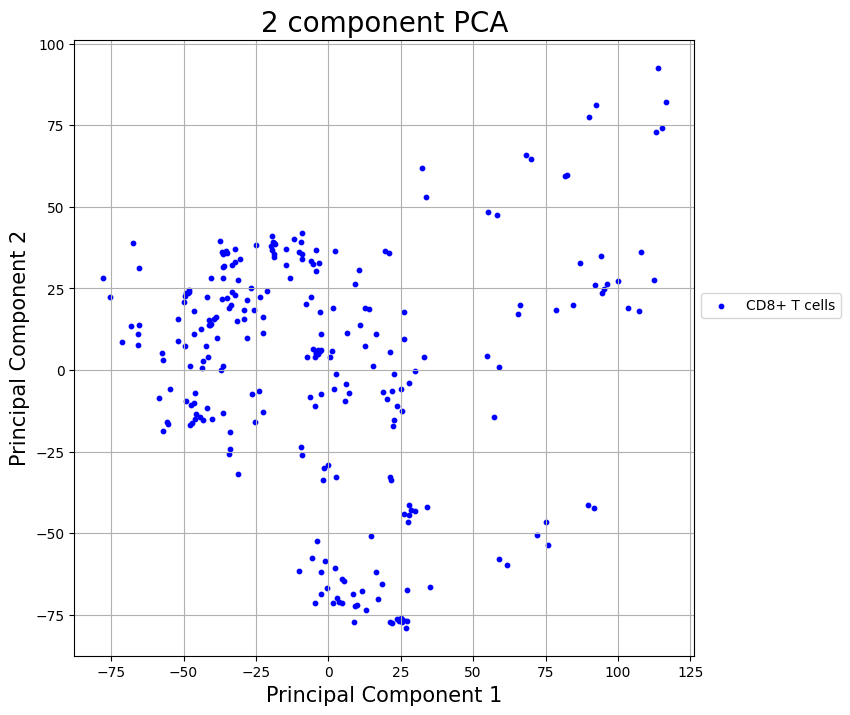

In [102]:
a=gt.loc[gt['Cell_type'] == 'T_cells']
a_geo=a['geo_accession'].values.tolist()
dee_typ=dee_top.loc[:, dee_top.columns.intersection(a_geo)]
gsm_list=dee_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
dee_typ.columns=class_list
dee_typ2=dee_typ.T
df=pd.DataFrame(dee_typ2.index)
from sklearn.preprocessing import StandardScaler
dee_st = StandardScaler().fit_transform(dee_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dee_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

# Об экстракт протоколах! Почему протокол C1 Integrated Fluidic Circuit дает низкую корреляцию?